In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skopt import gp_minimize
from skopt.space import Integer, Real
from skopt.plots import plot_convergence, plot_evaluations
os.chdir('/Users/vitalijstarikov/PycharmProjects/Shell_hachakton_2023')
from src.commons.utils import get_depot_param_space, get_refinery_param_space
from src.supply_chain_opt.greedy_algorithm import Greedy_algorithm

In [10]:
data = pd.read_csv('data/Biomass_History.csv', index_col=0)
dist = pd.read_csv('data/Distance_Matrix.csv', index_col=0)
biomass_2010 = data['2010']

# Greedy Algorithm
GA = Greedy_algorithm(biomass = biomass_2010,
                      dist = dist)

# Get space for depot optimization
space_depot, number_of_depots = get_depot_param_space(biomass=biomass_2010)
GA.number_of_depots = number_of_depots

# Optimize depot locations
GA.optimize = True
res_depot = gp_minimize(GA.objective_depot, space_depot, n_calls=200)
GA.optimize = False
depot_cost, _, biomass_demand_supply_solution = GA.objective_depot(space=res_depot.x)

# Get space for refinery optimization
space_refinery, number_of_refineries = get_refinery_param_space(biomass=GA.depot_biomass_supply)
GA.number_of_refineries = number_of_refineries

# Optimize refinery locations
GA.optimize = True
res_refinery = gp_minimize(GA.objective_refinery, space_refinery, n_calls=100)
GA.optimize = False
refinery_cost, _, pellet_demand_supply_solution = GA.objective_refinery(space=res_refinery.x)

Optimal number of depots is 14.
Optimal number of refineries is 2.


/Users/vitalijstarikov/anaconda/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/vitalijstarikov/anaconda/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/vitalijstarikov/anaconda/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Text(0.5, 1.0, 'Spatial Biomass Distribution')

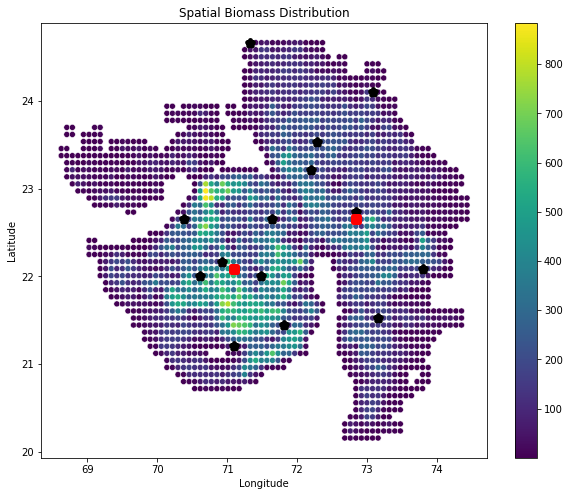

In [11]:
year = '2010'

plt.figure(figsize=(10, 8))
ax = sns.scatterplot(data=data, x='Longitude', y='Latitude', hue=year, palette='viridis')

norm = plt.Normalize(data[year].min(), data[year].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
ax.get_legend().remove()
ax.figure.colorbar(ax=ax, mappable=sm)

for loc in res_depot.x[:-1]:
    y,x = data.iloc[loc,[0]].values[0], data.iloc[loc,[1]].values[0]
    ax.scatter(x,y, label=f'Depot {loc} location', marker='*', color='black', linewidth=5)
for loc in res_refinery.x:
    y,x = data.iloc[loc, [0]].values[0], data.iloc[loc, [1]].values[0]
    ax.scatter(x,y, label=f'Refinery {loc} location', marker='s', color='red', linewidth=5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Biomass Distribution')

In [16]:
depot_cost + refinery_cost

29856217.544825755

In [13]:
GA.depot_biomass_supply

1523    77960.386713
1119    96080.181805
dtype: float64

In [ ]:
GA.refinery_biomass_supply